# Autoría:

                     Manuel López Amo-Ocón
                     Alejangro Galván Pérez-Ilzarbe
                     Santiago Cebellán
                     Alejandro Meza Tudela

# COVID-19 

La enfermedad por coronavirus (COVID 19) es una enfermedad infecciosa causada por un coronavirus recientemente descubierto. La mayoría de las personas que enferman de COVID 19 experimentan síntomas de leves a moderados y se recuperan sin tratamiento especial.


# Cómo se propaga

El virus que causa la COVID‑19 se transmite principalmente a través de las gotículas generadas cuando una persona infectada tose, estornuda o espira. Estas gotículas son demasiado pesadas para permanecer suspendidas en el aire y caen rápidamente sobre el suelo o las superficies.

Usted puede infectarse al inhalar el virus si está cerca de una persona con COVID‑19 o si, tras tocar una superficie contaminada, se toca los ojos, la nariz o la boca.

Mas información:
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/home.ht

En el presente Notebook, se ha realizado una primera aproximación del comportamiento de esta enfermedad sobre una población dada. En un futuro, el código se podría adaptar para cualquier otra enfermedad. 

# Librerías

In [6]:
#Importar librerias? Pues claro que me importan!
!pip install plotly==4.7.0
!pip install seaborn==0.10.1
import numpy as np #agrega soporte para vectores y matrices, contituye biblioteca de funciones de alto nivel
from numpy import random #random permite la generacion de numeros aleatorios 
from random import choices #choices esta dedicado a la representacion de pesos 
import os 
import seaborn as sns
import matplotlib.pyplot as plt #Dedicado a la representacion grafica 
from scipy.stats import rv_discrete
import pandas as pd


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Variables globales

In [7]:
#Definicion de variables 
mediaincubacion = 7 #media de dias de la incubacion
desvincubacion = 3 #desviacion de la incubacion 
mediaduracion = 14 #media de duracion 
desvduracion = 5 #deviacion de la duracion 
posibilidadContagio = 0.9990 #posibilidad de que una sola persona no te contagie en una hora en el mismo edificio
cambioEstadoInicial = 15 #tiempo en dias que se tarda en cambiar de estado
numpersonas = 800 #numero de personas de la simulacion 
personasEdificio = 50 #numero de personas/edificio 
horassimulacion = 2400 #horas de la simulacion 
maxPiso=16 #maximo de personas que hay en un piso

#Primera columna=rangos de edades, Segunda columna= Mortalidades totales
mortalidadEdadesCovid=[[10,20,30,40,50,60,70,80,1000],[0.01,0.2,0.2,0.2,0.4,1.3,3.6,8,14.9]]
mortalidadEdadesCovid[1][:]=[x /0.6 for x in mortalidadEdadesCovid[1][:]]#dividimos entre 0.6 para tener en cuenta a los asintomaticos

# Definición de clases

De cara a la segunda versión del simulador, se ha optado por la creación de la clase persona, clase simulador y clase edificio.  

Atributos clase persona: idpersona, edad, estados posibles, cambioEstado, contadorInfecciones, dni, idVivienda, idOficina ,
lugarActual, horario, HeTrabajado, HeVisitado. 

Atributos de la clase simulador: dtrEdad, ciudad, dia, hora, numpersonasinicial, numpersonas, numViviendas, numOficinas, serviciosDisponibles, capacidades, CatalogoPersonas, cementerio, RegistroSanos, RegistroMuertos, mortalidadEdadesCovid.  

Atributos de la clase edificio: capacidadEdificio, numeroEdificio, departamentos, habitantesPorDepartamento, tipo. 

In [8]:
from SimuladorV15 import * #importacion de clase simulador 
from EdificioV16 import * #importacion de la clase edificio
from PersonaV14 import * #importacion de la clase persona 

# Funciones

In [9]:
#Funcion que permite mostrar en pantalla la ciudad
def printearciudad(ciudad):        
    for j in range(len(ciudad)):
        for i in range(len(ciudad[j])):
            print(ciudad[j][i])
        print()        
        
#Funcion que dada la ciudad, y un indice, permite imprimir el edificio que corresponda a ese indice
def printearEdificio(ciudad , i):
     for j in range(len(ciudad[i])):
        print(ciudad[i][j])
    

# Código encargado de la simulación

Num.Edificio: 0 , PersonasEdificio: 61, MaxCapacidad: 16
Num.Edificio: 1 , PersonasEdificio: 27, MaxCapacidad: 16
Num.Edificio: 2 , PersonasEdificio: 48, MaxCapacidad: 16
Num.Edificio: 3 , PersonasEdificio: 49, MaxCapacidad: 16
Num.Edificio: 4 , PersonasEdificio: 46, MaxCapacidad: 16
Num.Edificio: 5 , PersonasEdificio: 42, MaxCapacidad: 16
Num.Edificio: 6 , PersonasEdificio: 53, MaxCapacidad: 16
Num.Edificio: 7 , PersonasEdificio: 53, MaxCapacidad: 16
Num.Edificio: 8 , PersonasEdificio: 49, MaxCapacidad: 16
Num.Edificio: 9 , PersonasEdificio: 44, MaxCapacidad: 16
Num.Edificio: 10 , PersonasEdificio: 41, MaxCapacidad: 16
Num.Edificio: 11 , PersonasEdificio: 26, MaxCapacidad: 16
Num.Edificio: 12 , PersonasEdificio: 67, MaxCapacidad: 16
Num.Edificio: 13 , PersonasEdificio: 35, MaxCapacidad: 16
Num.Edificio: 14 , PersonasEdificio: 54, MaxCapacidad: 16
Num.Edificio: 15 , PersonasEdificio: 39, MaxCapacidad: 16
Num.Edificio: 16 , PersonasEdificio: 50, MaxCapacidad: 16
Num.Edificio: 17 , Perso

[0.9997619047619047, 0.00023809523809525945] 36
[0.9999880952380953, 1.1904761904713013e-05] 6
[0.9997619047619047, 0.00023809523809525945] 29
--------
 
 
Dia: 20 || Hora: 0
-----------


 
 
 
 
--------
Contagio en la casa 12!
0.0003253981887492152
Contagio en la casa 15!
0.0009194478259056948
0.003353648846761814
[0.9997619047619047, 0.00023809523809525945] 36
[0.9999880952380953, 1.1904761904713013e-05] 6
[0.998452380952381, 0.00154761904761902] 59
[0.9997619047619047, 0.00023809523809525945] 29
[0.998452380952381, 0.00154761904761902] 51
--------
 
 
Dia: 21 || Hora: 0
-----------


 
 
 
 
--------
Contagio en la casa 12!
0.0005303144970462137
Contagio en la oficina 2!
0.0009211088911871279
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945] 11
[0.9999880952380953, 1.1904761904713013e-05] 6
[0.998452380952381, 0.00154761904761902] 59
[0.9997619047619047, 0.00023809523809525945] 29
[0.998452380952381, 0.00154761904761902] 51
[0.99976190476

Contagio en la oficina 4!
0.0010078571646778833
0.0035652569118158617
Contagio en la casa 15!
0.00182925393928568
[0.998452380952381, 0.00154761904761902] 52
[0.9822619047619048, 0.01773809523809522] 89
[0.9957142857142857, 0.004285714285714337] 67
[0.998452380952381, 0.00154761904761902] 58
[0.9997619047619047, 0.00023809523809525945] 25
[0.9997619047619047, 0.00023809523809525945] 32
[0.9997619047619047, 0.00023809523809525945] 40
[0.9997619047619047, 0.00023809523809525945] 20
[0.9997619047619047, 0.00023809523809525945] 11
[0.998452380952381, 0.00154761904761902] 59
[0.9957142857142857, 0.004285714285714337] 62
[0.9995238095238095, 0.0004761904761905189] 45
[0.9822619047619048, 0.01773809523809522] 82
[0.9997619047619047, 0.00023809523809525945] 29
[0.9957142857142857, 0.004285714285714337] 68
[0.998452380952381, 0.00154761904761902] 51
[0.998452380952381, 0.00154761904761902] 55
[0.9999880952380953, 1.1904761904713013e-05] 10
[0.9997619047619047, 0.00023809523809525945] 39
[0.9997

0.0030023686676569072
0.0009937982223841013
0.00044067747620490927
0.00022511115690593275
0.001904837153434924
Contagio en la oficina 6!
0.0014448343612867287
Contagio en la casa 9!
0.000993721546057813
Contagio en la casa 17!
0.0009262254327501163
[0.998452380952381, 0.00154761904761902] 59
[0.9822619047619048, 0.01773809523809522] 86
[0.9957142857142857, 0.004285714285714337] 67
[0.998452380952381, 0.00154761904761902] 58
[0.998452380952381, 0.00154761904761902] 59
[0.998452380952381, 0.00154761904761902] 57
[0.9997619047619047, 0.00023809523809525945] 25
[0.9997619047619047, 0.00023809523809525945] 12
[0.9997619047619047, 0.00023809523809525945] 32
[0.9997619047619047, 0.00023809523809525945] 20
[0.9957142857142857, 0.004285714285714337] 67
[0.9957142857142857, 0.004285714285714337] 62
[0.9822619047619048, 0.01773809523809522] 82
[0.9995238095238095, 0.0004761904761905189] 42
[0.9957142857142857, 0.004285714285714337] 66
[0.9957142857142857, 0.004285714285714337] 68
[0.9997619047619

Contagio en la casa 12!
0.004397022263720296
Contagio en la casa 16!
0.0008745795600079154
Contagio en el vestibulo de la oficina 0!
0.0010457773699429351
Contagio en el vestibulo de la oficina 0!
0.00023872028559057679
Contagio en la casa 0!
0.0009666356146694755
[0.998452380952381, 0.00154761904761902] 59
[0.9995238095238095, 0.0004761904761905189] 50
[0.9822619047619048, 0.01773809523809522] 86
[0.998452380952381, 0.00154761904761902] 58
[0.9957142857142857, 0.004285714285714337] 67
[0.998452380952381, 0.00154761904761902] 58
[0.998452380952381, 0.00154761904761902] 59
[0.998452380952381, 0.00154761904761902] 57
[0.9957142857142857, 0.004285714285714337] 66
[0.9997619047619047, 0.00023809523809525945] 12
[0.9997619047619047, 0.00023809523809525945] 32
[0.9957142857142857, 0.004285714285714337] 67
[0.9822619047619048, 0.01773809523809522] 82
[0.9995238095238095, 0.0004761904761905189] 42
[0.998452380952381, 0.00154761904761902] 51
[0.998452380952381, 0.00154761904761902] 59
[0.995714

Contagio en el vestibulo de la oficina 4!
0.001981181521933606
Contagio en la casa 9!
0.0001939517307935068
0.003762230212435158
Contagio en la casa 2!
0.0007680828588690902
[0.9995238095238095, 0.0004761904761905189] 50
[0.9822619047619048, 0.01773809523809522] 86
[0.998452380952381, 0.00154761904761902] 58
[0.998452380952381, 0.00154761904761902] 58
[0.998452380952381, 0.00154761904761902] 57
[0.9957142857142857, 0.004285714285714337] 66
[0.9995238095238095, 0.0004761904761905189] 41
[0.9957142857142857, 0.004285714285714337] 65
[0.9997619047619047, 0.00023809523809525945] 12
[0.9997619047619047, 0.00023809523809525945] 18
[0.9999880952380953, 1.1904761904713013e-05] 6
[0.9904761904761905, 0.00952380952380949] 71
[0.9904761904761905, 0.00952380952380949] 72
[0.9904761904761905, 0.00952380952380949] 72
[0.9997619047619047, 0.00023809523809525945] 32
[0.9957142857142857, 0.004285714285714337] 68
[0.9957142857142857, 0.004285714285714337] 67
[0.998452380952381, 0.00154761904761902] 58
[

0.000767913480096527
Contagio en el vestibulo de la oficina 8!
0.0014044634320464766
Contagio en la casa 6!
0.0007400080948782861
Contagio en el vestibulo de la oficina 5!
0.0003049305341042974
0.0012701505275500846
Contagio en la casa 12!
0.0014275878263846353
[0.998452380952381, 0.00154761904761902] 57
[0.9997619047619047, 0.00023809523809525945] 39
[0.9997619047619047, 0.00023809523809525945] 32
[0.9997619047619047, 0.00023809523809525945] 23
[0.9997619047619047, 0.00023809523809525945] 29
[0.9822619047619048, 0.01773809523809522] 86
[0.998452380952381, 0.00154761904761902] 58
[0.998452380952381, 0.00154761904761902] 58
[0.998452380952381, 0.00154761904761902] 55
[0.998452380952381, 0.00154761904761902] 57
[0.9957142857142857, 0.004285714285714337] 66
[0.9995238095238095, 0.0004761904761905189] 41
[0.9957142857142857, 0.004285714285714337] 65
[0.9999880952380953, 1.1904761904713013e-05] 9
[0.9995238095238095, 0.0004761904761905189] 48
[0.9997619047619047, 0.00023809523809525945] 12


0.0002304693912560385
0.0012967690376881613
0.0008878663513166574
0.0008852024895155131
Contagio en la casa 16!
0.0040414486186742815
0.0005051239996023416
Contagio en el vestibulo de la oficina 6!
0.0013390039245469998
0.0018310083871129201
0.0012635600005220793
0.0017586825759218216
Contagio en la casa 12!
0.0013650944600503978
Contagio en la casa 16!
0.004462903925491313
0.0023668426975197443
Contagio en la oficina 4!
0.0007975893649829757
0.001349603720410597
Contagio en la oficina 14!
0.0004689480938891988
0.0009210830892764088
Contagio en la oficina 5!
0.0012851491711955987
0.006752724188070713
Contagio en el vestibulo de la oficina 5!
0.0014994603489781877
Contagio en la oficina 11!
0.0006896657964217123
7.074799399953147e-05
Contagio en la casa 6!
0.0007767551407810158
0.0029029889458132008
0.0012188788612060852
Contagio en la casa 6!
0.001295377666398645
Contagio en la casa 16!
0.0015208954032330801
[0.998452380952381, 0.00154761904761902] 57
[0.9997619047619047, 0.00023809523

0.0005127240998975546
Contagio en la oficina 4!
0.0009029859131892692
Contagio en la casa 0!
0.001831958186160998
Contagio en la oficina 5!
0.0001529381875593483
0.0012246990949302816
Contagio en el vestibulo de la oficina 10!
0.0009909371686197543
[0.998452380952381, 0.00154761904761902] 57
[0.9997619047619047, 0.00023809523809525945] 39
[0.9997619047619047, 0.00023809523809525945] 32
[0.9997619047619047, 0.00023809523809525945] 23
[0.998452380952381, 0.00154761904761902] 51
[0.9997619047619047, 0.00023809523809525945] 15
[0.9997619047619047, 0.00023809523809525945] 29
[0.9997619047619047, 0.00023809523809525945] 28
[0.9995238095238095, 0.0004761904761905189] 47
[0.9997619047619047, 0.00023809523809525945] 40
[0.998452380952381, 0.00154761904761902] 55
[0.9999880952380953, 1.1904761904713013e-05] 4
[0.9957142857142857, 0.004285714285714337] 66
[0.9995238095238095, 0.0004761904761905189] 41
[0.9999880952380953, 1.1904761904713013e-05] 9
[0.9995238095238095, 0.0004761904761905189] 48
[0

4.881922599486721e-05
6.751448951836103e-05
0.00011075855692543879
Contagio en el vestibulo de la oficina 0!
0.0010714166833345473
0.0015905236870409345
Contagio en la casa 12!
0.0004601946798894474
0.0007052980705735123
0.00079399431487015
0.001830438901255338
Contagio en el vestibulo de la oficina 7!
0.00168660946720256
0.0009831201434256087
Contagio en el vestibulo de la oficina 13!
0.0008468729392587804
Contagio en la oficina 14!
0.0003039432629502459
Contagio en el vestibulo de la oficina 11!
0.0020358839740668433
0.00024808483859661834
0.00022142325369256532
Contagio en el vestibulo de la oficina 4!
0.002768093935895388
0.0004915678316301797
0.00014890356855556952
0.002825831403528767
0.0003292930734749566
0.0005993178136183275
[0.9997619047619047, 0.00023809523809525945] 32
[0.998452380952381, 0.00154761904761902] 57
[0.9997619047619047, 0.00023809523809525945] 39
[0.9997619047619047, 0.00023809523809525945] 23
[0.998452380952381, 0.00154761904761902] 51
[0.9997619047619047, 0.0

0.0011029816878880272
Contagio en la casa 13!
0.0017436620827365745
Contagio en la casa 9!
0.0017164106148117586
0.00036046032287773144
Contagio en la casa 11!
0.0004546470263739888
0.0034604115682329573
0.002170040258731687
Contagio en la oficina 14!
0.000665026750913511
0.0028352289036552847
0.0008469288545122078
Contagio en el vestibulo de la oficina 10!
0.00013867021483759956
0.0014670978992682437
0.00024621303405869543
0.0023829184578227913
Contagio en la oficina 14!
0.0016791769032876713
0.00011863839467629589
Contagio en la casa 7!
0.0006988655426022339
Contagio en la oficina 15!
0.0008508074003896748
Contagio en la oficina 2!
0.0015933400738789016
0.0010139319740166686
0.0016556374556269127
Contagio en la casa 1!
0.0002030273951127981
Contagio en el vestibulo de la oficina 13!
0.00033323498972859245
Contagio en la casa 7!
0.0002027135490586529
Contagio en la casa 7!
0.0018078270515083927
0.004938685029211909
[0.9997619047619047, 0.00023809523809525945] 32
[0.998452380952381, 0.

[0.9997619047619047, 0.00023809523809525945] 21
[0.9957142857142857, 0.004285714285714337] 63
[0.9997619047619047, 0.00023809523809525945] 25
[0.9957142857142857, 0.004285714285714337] 66
[0.9904761904761905, 0.00952380952380949] 74
[0.9997619047619047, 0.00023809523809525945] 40
[0.9822619047619048, 0.01773809523809522] 81
[0.9999880952380953, 1.1904761904713013e-05] 1
[0.998452380952381, 0.00154761904761902] 58
[0.9997619047619047, 0.00023809523809525945] 37
[0.9997619047619047, 0.00023809523809525945] 30
[0.9957142857142857, 0.004285714285714337] 63
[0.9822619047619048, 0.01773809523809522] 83
[0.9822619047619048, 0.01773809523809522] 89
[0.998452380952381, 0.00154761904761902] 56
[0.9997619047619047, 0.00023809523809525945] 14
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945] 12
[0.9997619047619047, 0.00023809523809525945] 32
[0.9997619047619047, 0.00023809523809525945] 32
[0.9822619047619048, 0.01773809523809522] 88
[0.9997619047619047, 0

[0.9997619047619047, 0.00023809523809525945] 30
[0.9957142857142857, 0.004285714285714337] 63
[0.9822619047619048, 0.01773809523809522] 83
[0.9822619047619048, 0.01773809523809522] 89
[0.9997619047619047, 0.00023809523809525945] 14
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945] 12
[0.9997619047619047, 0.00023809523809525945] 32
[0.9997619047619047, 0.00023809523809525945] 32
[0.9822619047619048, 0.01773809523809522] 88
[0.9997619047619047, 0.00023809523809525945] 32
[0.9999880952380953, 1.1904761904713013e-05] 7
[0.9997619047619047, 0.00023809523809525945] 19
[0.998452380952381, 0.00154761904761902] 60
[0.9997619047619047, 0.00023809523809525945] 21
[0.9904761904761905, 0.00952380952380949] 74
[0.9997619047619047, 0.00023809523809525945] 29
[0.9997619047619047, 0.00023809523809525945] 39
[0.9957142857142857, 0.004285714285714337] 63
[0.9995238095238095, 0.0004761904761905189] 44
[0.9822619047619048, 0.01773809523809522] 83
[0.99998809523809

[0.9997619047619047, 0.00023809523809525945] 34
[0.9995238095238095, 0.0004761904761905189] 49
[0.9999880952380953, 1.1904761904713013e-05] 4
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 11
[0.998452380952381, 0.00154761904761902] 52
[0.9957142857142857, 0.004285714285714337] 66
[0.9995238095238095, 0.0004761904761905189] 45
[0.9999880952380953, 1.1904761904713013e-05] 0
[0.9997619047619047, 0.00023809523809525945] 35
[0.9999880952380953, 1.1904761904713013e-05] 5
[0.9997619047619047, 0.00023809523809525945] 40
[0.9997619047619047, 0.00023809523809525945] 28
[0.9997619047619047, 0.00023809523809525945] 37
[0.9999880952380953, 1.1904761904713013e-05] 4
[0.9997619047619047, 0.00023809523809525945] 37
[0.9904761904761905, 0.00952380952380949] 75
[0.9904761904761905, 0.00952380952380949] 75
[0.9997619047619047, 0.00023809523809525945] 35
[0.9999880952380953, 1.1904761904713013e-05] 0
[0.9995238095238095, 0.0004761904761905189] 45
[0.9997619047619

Contagio en la oficina 9!
0.0004993000187121233
0.0006599878811700544
Contagio en el vestibulo de la oficina 12!
0.00034685496949349304
0.0012147332784160358
Contagio en la casa 7!
0.0015280500958452237
0.0005887804004308661
Contagio en la casa 8!
0.0015110882418446492
Contagio en el vestibulo de la oficina 5!
0.0008314737688435159
0.0011979536405485325
6.654327950561534e-05
[0.9997619047619047, 0.00023809523809525945] 32
[0.9957142857142857, 0.004285714285714337] 67
[0.998452380952381, 0.00154761904761902] 51
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 28
[0.9997619047619047, 0.00023809523809525945] 28
[0.9995238095238095, 0.0004761904761905189] 44
[0.9997619047619047, 0.00023809523809525945] 32
[0.9995238095238095, 0.0004761904761905189] 50
[0.9957142857142857, 0.004285714285714337] 62
[0.9822619047619048, 0.01773809523809522] 88
[0.9997619047619047, 0.00023809523809525945] 28
[0.9995238095238095, 0.0004761904761905189] 47
[0.9984523809523

0.0006534838422407319
0.0017746190996825728
Contagio en la casa 15!
0.0008138645522594024
0.004491730112273107
0.0011002450370445338
Contagio en el vestibulo de la oficina 13!
0.0003337161210893447
Contagio en la casa 9!
0.001011360740164613
Contagio en la casa 14!
0.0008329272612439542
0.0017209321576812098
Contagio en la casa 3!
0.0006617600125673473
0.0007682571995718535
Contagio en la casa 11!
0.0004518326081655033
0.003771635057493561
0.0008079817643851239
0.0056186166473322086
[0.9997619047619047, 0.00023809523809525945] 32
[0.9957142857142857, 0.004285714285714337] 67
[0.998452380952381, 0.00154761904761902] 51
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 28
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945] 32
[0.9957142857142857, 0.004285714285714337] 62
[0.9822619047619048, 0.01773809523809522] 88
[0.9995238095238095, 0.0004761904761905189] 47
[0.9995238095238095, 0.0004761904761905189] 47
[

0.0015886902038757533
0.00043740261183122797
Contagio en la oficina 8!
0.0018741112043385577
Contagio en la casa 6!
0.00461952063130211
Contagio en el vestibulo de la oficina 3!
0.0007749077150858152
0.0030996041704359767
0.001302148601896258
0.0006998531943414044
[0.9997619047619047, 0.00023809523809525945] 32
[0.9957142857142857, 0.004285714285714337] 67
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945] 32
[0.9957142857142857, 0.004285714285714337] 62
[0.9822619047619048, 0.01773809523809522] 88
[0.9995238095238095, 0.0004761904761905189] 47
[0.998452380952381, 0.00154761904761902] 51
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619047, 0.00023809523809525945] 37
[0.9957142857142857, 0.004285714285714337] 70
[0.9997619047619047, 0.00023809523809525945] 26
[0.9997619047619047, 0.00023809523809525945] 34
[0.9957142857142857, 0.004285714285714337] 63
[0.9997619047619047, 0.0002380952380952

Contagio en el vestibulo de la oficina 13!
0.00035028754956234476
0.0037352117998752377
0.0025669959812953946
0.001366900746033628
Contagio en la oficina 5!
0.0010388224425770254
0.002732193968223995
Contagio en la casa 1!
0.0007277534939649222
Contagio en la oficina 3!
0.00034216236009843026
0.0007637436212956095
0.0001653767196748701
[0.9997619047619047, 0.00023809523809525945] 32
[0.9957142857142857, 0.004285714285714337] 67
[0.9957142857142857, 0.004285714285714337] 66
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945] 32
[0.9822619047619048, 0.01773809523809522] 88
[0.9995238095238095, 0.0004761904761905189] 47
[0.998452380952381, 0.00154761904761902] 53
[0.9957142857142857, 0.004285714285714337] 70
[0.9997619047619047, 0.00023809523809525945] 26
[0.9997619047619047, 0.00023809523809525945] 34
[0.9999880952380953, 1.1904761904713013e-05] 6
[0.9997619047619047, 0.00023809523809525945] 28
[0.995714

-----------


 
 
 
 
--------
0.0006354835555903993
0.006882156853912025
0.0002360796703799739
0.003917494166076785
5.6199196995954104e-05
0.0017609387785669783
0.00277413258156034
0.0013973957722503982
0.0017589749641861996
0.004888821115342501
0.0007874335841275837
0.0002302109668025354
0.002014398685940444
Contagio en la oficina 3!
9.84668136441158e-05
0.0007676307120324521
0.0009790805452160045
0.0010771922609376094
Contagio en el vestibulo de la oficina 11!
0.00017965968480326833
0.0018354381139696896
0.0027637414920640424
Contagio en la casa 5!
0.0017597732778051878
0.003581813060838157
0.0005850534427428444
Contagio en el vestibulo de la oficina 13!
0.0017905524329708822
0.0006694280987538104
Contagio en el vestibulo de la oficina 7!
0.000687098568878497
[0.9957142857142857, 0.004285714285714337] 67
[0.9957142857142857, 0.004285714285714337] 66
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 36
[0.9997619047619047, 0.00023809523809525945

0.005975723600257776
8.435922423544184e-05
0.004916922206112839
Contagio en la casa 14!
0.0033011861801532927
0.00026183953351921474
Contagio en la casa 7!
0.0014357407604773664
0.0013464653694187367
Contagio en la casa 3!
0.0023914036594622212
Contagio en la casa 9!
0.001767192764073
1.458736086612511e-05
Contagio en la casa 6!
0.001801677709590499
Contagio en la casa 15!
0.003935471540289948
0.00027119545918874444
0.0012722501949334886
Contagio en la casa 17!
0.0017322454362901363
0.0010625354996446346
0.000815820870619488
Contagio en la casa 4!
0.0021746026239678473
Contagio en la casa 14!
0.0007170031546440692
Contagio en la casa 8!
0.0005366842449845421
Contagio en la casa 9!
0.0017642051089713506
0.003563232836757191
0.0026843418588380352
[0.9997619047619047, 0.00023809523809525945] 26
[0.9957142857142857, 0.004285714285714337] 66
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 36
[0.9999880952380953, 1.1904761904713013e-05] 1
[0.982261904

Contagio en la casa 5!
0.0009793129244316523
Contagio en la casa 14!
0.0013240431031407152
8.229218783872838e-05
0.002881767540243829
0.0008086705318183229
Contagio en la casa 7!
0.002588480392611725
0.0015031612324950538
0.007506534389174924
0.0005910820711320097
0.0004441178115215383
0.0019508976945548095
Contagio en la casa 8!
0.0027771448337049476
0.0006469304184741898
Contagio en el vestibulo de la oficina 0!
0.00048555647464187945
0.0002509560553354273
0.003646893183309907
0.0006316972148611155
0.0008974088929158963
0.0013650788398106295
0.0012211576621804499
[0.9997619047619047, 0.00023809523809525945] 26
[0.9957142857142857, 0.004285714285714337] 66
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 36
[0.9999880952380953, 1.1904761904713013e-05] 1
[0.9995238095238095, 0.0004761904761905189] 47
[0.998452380952381, 0.00154761904761902] 60
[0.998452380952381, 0.00154761904761902] 54
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619

0.0018938582425848116
0.00039458288285876275
0.0026951008016076194
0.0031382490881928238
0.000671093561678604
Contagio en la oficina 14!
0.001743748532796019
0.000344313795765272
Contagio en la casa 9!
0.00042112578989306204
0.0006644665760903168
0.005067379450408582
0.003921262685624427
0.002351423612998338
Contagio en la casa 13!
0.0016026870317549236
0.0025566020269807144
[0.9822619047619048, 0.01773809523809522] 88
[0.9904761904761905, 0.00952380952380949] 71
[0.9997619047619047, 0.00023809523809525945] 26
[0.9957142857142857, 0.004285714285714337] 66
[0.9997619047619047, 0.00023809523809525945] 36
[0.998452380952381, 0.00154761904761902] 55
[0.9999880952380953, 1.1904761904713013e-05] 1
[0.9995238095238095, 0.0004761904761905189] 47
[0.998452380952381, 0.00154761904761902] 60
[0.998452380952381, 0.00154761904761902] 54
[0.998452380952381, 0.00154761904761902] 53
[0.9997619047619047, 0.00023809523809525945] 13
[0.9997619047619047, 0.00023809523809525945] 16
[0.9999880952380953, 1.1

0.0002577140929428401
0.00021806118079004122
Contagio en la casa 15!
0.0012863057137728617
0.001563612341103915
0.0010070443202436774
0.0012847011939953745
Contagio en el vestibulo de la oficina 6!
0.002372726088354815
0.0007323931543048445
0.001064752228251642
0.0007331669533270357
Contagio en la oficina 13!
0.002855108526420125
0.00015602177720142052
0.0008798198031170212
0.0006044251196568595
0.0014788377773702344
0.00025994739757395635
0.001772497944822926
Contagio en la casa 14!
0.0004187325468775205
0.0008289024738435957
0.0002751216018935798
Contagio en el vestibulo de la oficina 12!
0.001886447410996972
0.004607423386867482
0.0006180735480960653
0.0033168252799627984
6.186269006513978e-05
0.0005840863037097632
Contagio en la casa 2!
0.0009373935966657809
0.00010195904586907112
0.0038959249147711983
[0.9822619047619048, 0.01773809523809522] 88
[0.9904761904761905, 0.00952380952380949] 71
[0.9997619047619047, 0.00023809523809525945] 26
[0.9957142857142857, 0.004285714285714337] 6

0.0013291408945065308
6.819734328766813e-05
0.0015265434160308677
Contagio en la casa 14!
0.0006133454699270846
0.0006232696416428318
0.0018807792166996018
Contagio en la casa 14!
0.0024006520400723375
0.0014345792324214068
Contagio en la casa 16!
0.0009087251197000823
0.000862231701535543
0.00010582992579000194
0.00025932593783639657
0.0005087109505165222
0.002287026896848565
0.004907909872567728
Contagio en la casa 7!
0.0017324453489844238
0.004442343185158459
0.0008355073027912496
0.001964857176266155
0.001318781095828614
0.0002824132889820419
[0.9822619047619048, 0.01773809523809522] 88
[0.9904761904761905, 0.00952380952380949] 71
[0.9995238095238095, 0.0004761904761905189] 46
[0.9997619047619047, 0.00023809523809525945] 26
[0.9957142857142857, 0.004285714285714337] 66
[0.998452380952381, 0.00154761904761902] 53
[0.998452380952381, 0.00154761904761902] 55
[0.9999880952380953, 1.1904761904713013e-05] 1
[0.9995238095238095, 0.0004761904761905189] 47
[0.998452380952381, 0.001547619047

[0.9997619047619047, 0.00023809523809525945] 28
[0.9997619047619047, 0.00023809523809525945] 13
[0.9957142857142857, 0.004285714285714337] 66
[0.9822619047619048, 0.01773809523809522] 83
[0.9904761904761905, 0.00952380952380949] 80
[0.998452380952381, 0.00154761904761902] 58
[0.998452380952381, 0.00154761904761902] 55
[0.9822619047619048, 0.01773809523809522] 85
[0.9997619047619047, 0.00023809523809525945] 35
[0.9995238095238095, 0.0004761904761905189] 42
[0.9995238095238095, 0.0004761904761905189] 50
[0.9904761904761905, 0.00952380952380949] 73
[0.9997619047619047, 0.00023809523809525945] 30
[0.9995238095238095, 0.0004761904761905189] 45
[0.9999880952380953, 1.1904761904713013e-05] 6
[0.9997619047619047, 0.00023809523809525945] 13
[0.998452380952381, 0.00154761904761902] 59
[0.9997619047619047, 0.00023809523809525945] 26
[0.9997619047619047, 0.00023809523809525945] 23
[0.998452380952381, 0.00154761904761902] 55
[0.9995238095238095, 0.0004761904761905189] 50
[0.9999880952380953, 1.1904

0.0015400074289707577
0.00035132182539698853
0.0006330147849352707
0.0003581080857842922
0.0007986187108858234
0.0008536754958066162
0.001015760071583438
0.0011262662844744309
0.0008499355691068411
Contagio en la casa 14!
0.002508500705990069
0.0046848571080668755
0.0009397073343517803
0.002106237359394081
4.5590570842857225e-05
0.0018198666379990458
Contagio en la oficina 6!
0.0015448050403058522
0.0006555942911115054
Contagio en la oficina 8!
0.0019663945119403614
Contagio en la oficina 9!
0.00020681687382806402
0.00014772698938414486
Contagio en la casa 2!
0.0019500638531170233
0.000786998611069456
0.0002660936014600157
[0.9822619047619048, 0.01773809523809522] 88
[0.9904761904761905, 0.00952380952380949] 71
[0.9995238095238095, 0.0004761904761905189] 46
[0.998452380952381, 0.00154761904761902] 53
[0.998452380952381, 0.00154761904761902] 55
[0.9997619047619047, 0.00023809523809525945] 28
[0.998452380952381, 0.00154761904761902] 60
[0.998452380952381, 0.00154761904761902] 54
[0.99976

0.00405438221469312
0.0022746425666314574
0.003373220149860523
0.0005626583376525662
0.0002635941209714332
[0.9822619047619048, 0.01773809523809522] 88
[0.9995238095238095, 0.0004761904761905189] 46
[0.998452380952381, 0.00154761904761902] 53
[0.998452380952381, 0.00154761904761902] 55
[0.9997619047619047, 0.00023809523809525945] 28
[0.998452380952381, 0.00154761904761902] 60
[0.998452380952381, 0.00154761904761902] 54
[0.998452380952381, 0.00154761904761902] 59
[0.9997619047619047, 0.00023809523809525945] 37
[0.9822619047619048, 0.01773809523809522] 83
[0.9904761904761905, 0.00952380952380949] 80
[0.9997619047619047, 0.00023809523809525945] 35
[0.9822619047619048, 0.01773809523809522] 92
[0.9995238095238095, 0.0004761904761905189] 50
[0.9904761904761905, 0.00952380952380949] 73
[0.9997619047619047, 0.00023809523809525945] 23
[0.998452380952381, 0.00154761904761902] 55
[0.9995238095238095, 0.0004761904761905189] 50
[0.9999880952380953, 1.1904761904713013e-05] 7
[0.9999880952380953, 1.1

0.00013095636844107084
0.0018090056359605367
0.0008253234877778626
[0.998452380952381, 0.00154761904761902] 55
[0.9997619047619047, 0.00023809523809525945] 28
[0.998452380952381, 0.00154761904761902] 59
[0.9997619047619047, 0.00023809523809525945] 22
[0.9997619047619047, 0.00023809523809525945] 37
[0.9997619047619047, 0.00023809523809525945] 39
[0.9822619047619048, 0.01773809523809522] 83
[0.9997619047619047, 0.00023809523809525945] 35
[0.9822619047619048, 0.01773809523809522] 92
[0.9997619047619047, 0.00023809523809525945] 32
[0.998452380952381, 0.00154761904761902] 55
[0.9999880952380953, 1.1904761904713013e-05] 7
[0.9999880952380953, 1.1904761904713013e-05] 2
[0.9995238095238095, 0.0004761904761905189] 46
[0.9957142857142857, 0.004285714285714337] 68
[0.9997619047619047, 0.00023809523809525945] 37
[0.998452380952381, 0.00154761904761902] 51
[0.998452380952381, 0.00154761904761902] 52
[0.9997619047619047, 0.00023809523809525945] 31
[0.9997619047619047, 0.00023809523809525945] 24
[0.9

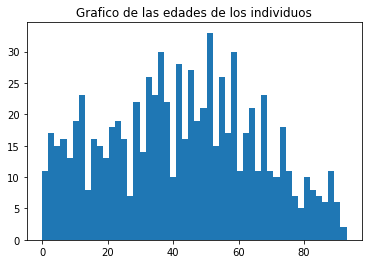

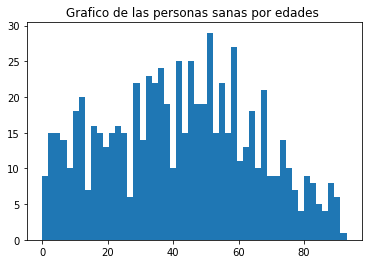

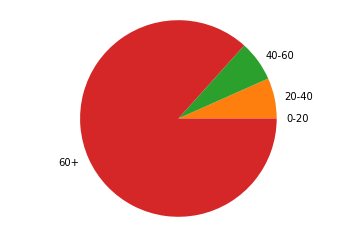

In [5]:
#creacion de un objeto de la clase simulador
MiSimulador=Simulador(numpersonas=numpersonas,personasEdificio=personasEdificio,maxPiso=maxPiso,mortalidadEdadesCovid=mortalidadEdadesCovid,aforoMedio=7)

#se crea un paciente que resulta ser el 0, pasandole 15 dias como dia para el cambio de estado
MiSimulador.contagio_fijo(cambioEstadoInicial,10) 
#MiSimulador.graficoPersonasEdades()
#MiSimulador.printearCatalogo()
for i in range(horassimulacion): #horas que pasa la simulacion 
    '''
    Datos inventados:
    MediaIncubación:7 dias
    DesvIncubación:3 dias
    MediaDuracion:14 dias
    DescDuracion:5 dias
    '''
    MiSimulador.pasar_tiempo(mediaincubacion,desvincubacion,mediaduracion,desvduracion,posibilidadContagio)
    if MiSimulador.hora==0:  
        print("--------")
        print(" ")
        print(" ")
        print(f"Dia: {MiSimulador.dia} || Hora: {MiSimulador.hora}")
        #print(MiSimulador.serviciosDisponibles)
        #print(MiSimulador.ciudadOficinas[0].printearpersonas())
        #if MiSimulador.hora%20==0:
        #MiSimulador.printearCatalogo()
        print("-----------")
        print("")
        #MiSimulador.ciudadOficinas[0].printearpersonas()
        print("")
        print(" ")
        print(" ")
        print(" ")
        print(" ")
        print("--------")
        
MiSimulador.mostrarcementerio()
MiSimulador.graficoPersonasEdades()
MiSimulador.graficoPersonasSanas()
MiSimulador.defuncionesPorEdades()

In [ ]:
#MiSimulador.ciudadOficinas[3].horarios
MiSimulador.printearCatalogo()

In [ ]:
MiSimulador.mostrarcementerio()

In [ ]:
MiSimulador.pasar_tiempo(mediaincubacion,desvincubacion,mediaduracion,desvduracion,posibilidadContagio)
print(MiSimulador.aforoMedio)
kk=0
for i in MiSimulador.ciudadOficinas:
    print(len(i.vestibulo))

    kk+=len(i.vestibulo)
print(kk)

In [ ]:
MiSimulador.dia

In [ ]:
for i in MiSimulador.ciudadOficinas:
    print("-----------")
    print("")
    i.printearpersonas()
    print("")
    print("-----------")